# Bayesian Inference of a Primary Outcome in a Clinical Trial in a Subsample

by Walker Blackston, MSPH

### Purpose:
The following analysis will provide an estimate of the treatment effect of our company's proprietary product in a limited sample of subjects with a prior procedure. This is a subsample (n=9) of a randomized control trial (n=298) completed last year. 

We will compare rates of achieving the primary outcome between treatment and placebo groups and use previous trial results as our priors to calculate posterior probabilities of treatment effect. 

In [1]:
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

from matplotlib import MatplotlibDeprecationWarning

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

import pymc3 as pm

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


#### Prior distribution:
Based on previous results in similarly constructed trials, we can reasonably expect for the treatment group to achieve the primary outcome 38% of the time, with the placebo at 30%. 

We can simulate our priors to get a posterior distribution, which will feed into our next prior for further analysis by the following:

In [3]:
# create array from our data with 1 being achieved outcome, 0 did not achieve outcome
trt_success = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0])
pbo_success = np.array([1, 0, 0, 1, 0, 0, 0, 0, 0])

In [4]:
def sim_beta_post(trials, beta_priorA, beta_priorB):
    num_success = np.sum(trials)
    post_draws = np.random.beta(
        num_success + beta_priorA,
        len(trials) - num_success + beta_priorB, 1000)
    return post_draws

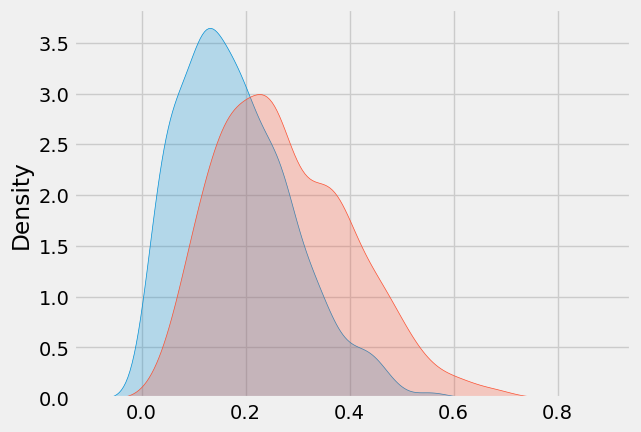

In [5]:
A_post = sim_beta_post(trt_success, 1, 1)
B_post = sim_beta_post(pbo_success, 1, 1)

sns.kdeplot(A_post, shade = True, label = "Treatment")
sns.kdeplot(B_post, shade = True, label = "Placebo")

plt.show()

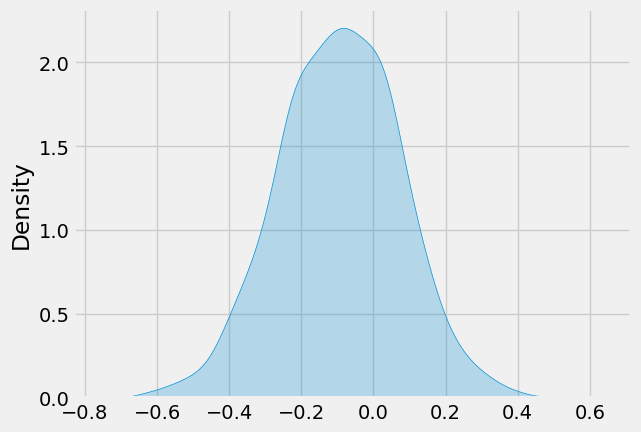

In [17]:
trt_diff = A_post - B_post

sns.kdeplot(trt_diff, shade = True, label = "treatment difference")
plt.show()

So if we want to determine the probability of "A" being better (i.e. placebo), we do the following:

In [19]:
(trt_diff > 0).mean()

0.299

And if we were to incorporate our estimate from above of an 8% treatment difference, *favoring* the treatment, what is our new posterior probability?

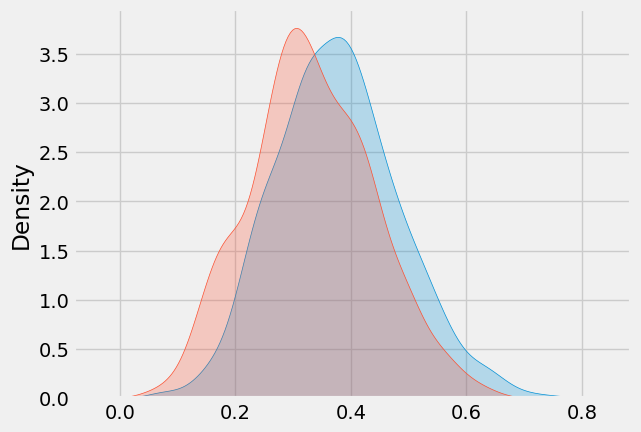

In [11]:
A_post2 = sim_beta_post(trt_success, 7, 5)
B_post2 = sim_beta_post(pbo_success, 4, 5) 

sns.kdeplot(A_post2, shade = True, label = "Treatment")
sns.kdeplot(B_post2, shade = True, label = "Placebo")

plt.show()

And then we can further update our priors to incorporate the full dataset:

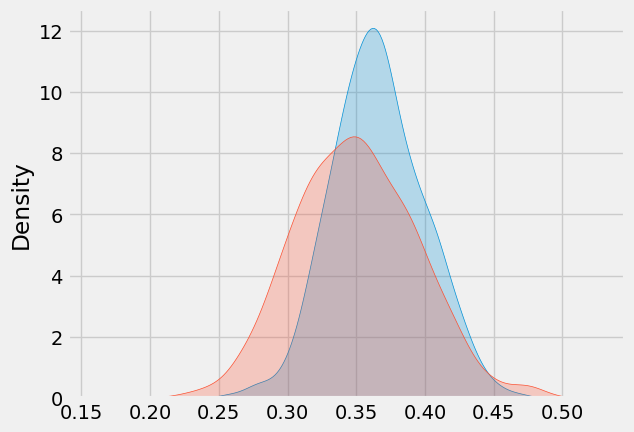

In [12]:
trt_full = np.random.binomial(n=1, p=0.3687, size=[198])
pbo_full = np.random.binomial(n=1, p=0.3093, size=[97])

A_post3 = sim_beta_post(trt_full, 7, 5)
B_post3 = sim_beta_post(pbo_full, 4, 5)

sns.kdeplot(A_post3, shade = True, label = "Treatment")
sns.kdeplot(B_post3, shade = True, label = "Placebo")

plt.show()

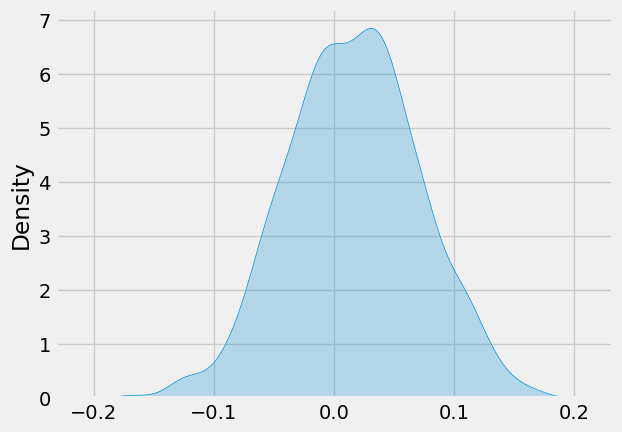

In [15]:
trt_diff3 = A_post3 - B_post3

sns.kdeplot(trt_diff3, shade = True, label = "treatment difference")
plt.show()

In [16]:
(trt_diff3 > 0).mean()

0.599